In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('Churn_data1.csv')

In [3]:
data

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,...,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,...,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,5,0
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,...,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,5,0
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,...,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,1,0
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,...,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,1,1
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,...,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,No,0,72,None,Yes,22.77,No,No,None,...,0,Landers,92285,34.341737,-116.539416,2182,0,5306,0,0
7039,6840-RESVB,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,...,2,Adelanto,92301,34.667815,-117.536183,18980,0,2140,2,0
7040,2234-XADUH,Yes,4,72,None,Yes,29.66,Yes,Yes,Cable,...,2,Amboy,92304,34.559882,-115.637164,42,0,5560,2,0
7041,4801-JZAZL,Yes,1,11,None,No,0.00,No,Yes,DSL,...,2,Angelus Oaks,92305,34.167800,-116.864330,301,0,2793,0,0


In [4]:
data= data.drop('Customer ID', axis=1)
data = data.drop('Latitude', axis = 1)
data = data.drop('Longitude', axis = 1)

In [5]:
df = data.copy()

In [6]:
df.shape


(7043, 40)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Referred a Friend                  7043 non-null   object 
 1   Number of Referrals                7043 non-null   int64  
 2   Tenure in Months                   7043 non-null   int64  
 3   Offer                              7043 non-null   object 
 4   Phone Service                      7043 non-null   object 
 5   Avg Monthly Long Distance Charges  7043 non-null   float64
 6   Multiple Lines                     7043 non-null   object 
 7   Internet Service                   7043 non-null   object 
 8   Internet Type                      7043 non-null   object 
 9   Avg Monthly GB Download            7043 non-null   int64  
 10  Online Security                    7043 non-null   object 
 11  Online Backup                      7043 non-null   objec

In [8]:
df.isnull().sum()

Referred a Friend                    0
Number of Referrals                  0
Tenure in Months                     0
Offer                                0
Phone Service                        0
Avg Monthly Long Distance Charges    0
Multiple Lines                       0
Internet Service                     0
Internet Type                        0
Avg Monthly GB Download              0
Online Security                      0
Online Backup                        0
Device Protection Plan               0
Premium Tech Support                 0
Streaming TV                         0
Streaming Movies                     0
Streaming Music                      0
Unlimited Data                       0
Contract                             0
Paperless Billing                    0
Payment Method                       0
Monthly Charge                       0
Total Regular Charges                0
Total Refunds                        0
Total Extra Data Charges             0
Total Long Distance Charg

In [9]:
df.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Population,Churn,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,22139.603294,0.265370,4400.295755,1.338776,0.308107
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,21152.392837,0.441561,1183.057152,1.430471,0.717514
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,11.000000,0.000000,2003.000000,0.000000,0.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,2344.000000,0.000000,3469.000000,0.000000,0.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,17554.000000,0.000000,4527.000000,1.000000,0.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,36125.000000,1.000000,5380.500000,2.000000,0.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,105285.000000,1.000000,6500.000000,9.000000,6.000000


In [10]:
df.columns

Index(['Referred a Friend', 'Number of Referrals', 'Tenure in Months', 'Offer',
       'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'Number of Dependents',
       'City', 'Zip Code', 'Population', 'Churn', 'CLTV',
       'Total Customer Svc Requests', 'Product/Service Issues Reported'],
      dtype='object')

In [11]:
numerical_columns = df.select_dtypes(include =[int,float])
categorical_columns = df.select_dtypes(include = [object])

In [12]:
numerical_columns

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Population,Churn,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,0,1,0.00,9,41.236,39.65,0.00,0.0,0.00,78,0,90022,68701,1,5433,5,0
1,1,8,48.85,19,83.876,633.30,0.00,120.0,390.80,74,1,90063,55668,1,5302,5,0
2,0,18,11.33,57,99.268,1752.55,45.61,0.0,203.94,71,3,90065,47534,1,3179,1,0
3,1,25,19.76,13,102.440,2514.50,13.43,327.0,494.00,78,1,90303,27778,1,5337,1,1
4,1,37,6.33,15,79.560,2868.15,0.00,430.0,234.21,80,1,90602,26265,1,2793,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,72,22.77,0,21.150,1419.40,19.31,0.0,1639.44,30,0,92285,2182,0,5306,0,0
7039,1,24,36.05,24,84.800,1990.50,48.23,0.0,865.20,38,2,92301,18980,0,2140,2,0
7040,4,72,29.66,59,103.200,7362.90,45.38,4344.0,2135.52,30,2,92304,42,0,5560,2,0
7041,1,11,0.00,17,29.600,346.45,27.24,0.0,0.00,32,2,92305,301,0,2793,0,0


In [13]:
categorical_columns

,Referred a Friend,Offer,Phone Service,Multiple Lines,Internet Service,Internet Type,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,...,Unlimited Data,Contract,Paperless Billing,Payment Method,Gender,Under 30,Senior Citizen,Married,Dependents,City
0,No,None,No,No,Yes,Fiber Optic,No,No,Yes,No,...,No,Month-to-Month,Yes,Bank Withdrawal,Male,No,Yes,No,No,Los Angeles
1,Yes,Offer E,Yes,Yes,Yes,Cable,No,Yes,No,No,...,No,Month-to-Month,Yes,Credit Card,Female,No,Yes,Yes,Yes,Los Angeles
2,No,Offer D,Yes,Yes,Yes,Fiber Optic,No,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,Male,No,Yes,No,Yes,Los Angeles
3,Yes,Offer C,Yes,No,Yes,Fiber Optic,No,Yes,Yes,No,...,No,Month-to-Month,Yes,Bank Withdrawal,Female,No,Yes,Yes,Yes,Inglewood
4,Yes,Offer C,Yes,Yes,Yes,Cable,No,No,No,No,...,No,Month-to-Month,Yes,Bank Withdrawal,Female,No,Yes,Yes,Yes,Whittier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,None,Yes,No,No,None,No,No,No,No,...,No,Two Year,Yes,Bank Withdrawal,Female,No,No,No,No,Landers
7039,Yes,Offer C,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,...,Yes,One Year,Yes,Mailed Check,Male,No,No,Yes,Yes,Adelanto
7040,Yes,None,Yes,Yes,Yes,Cable,No,Yes,Yes,No,...,No,One Year,Yes,Credit Card,Female,No,No,Yes,Yes,Amboy
7041,Yes,None,No,No,Yes,DSL,Yes,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,Female,No,No,Yes,Yes,Angelus Oaks


In [14]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [15]:
df['Gender'].value_counts().sort_index()

Female    3488
Male      3555
Name: Gender, dtype: int64

In [16]:
df['Age'].value_counts().sort_index()

19    127
20    127
21    140
22    130
23    146
     ... 
76     69
77     72
78     63
79     76
80     66
Name: Age, Length: 62, dtype: int64

In [17]:
df['Offer'].unique()

array(['None', 'Offer E', 'Offer D', 'Offer C', 'Offer B', 'Offer A'],
      dtype=object)

In [18]:
df['Offer'].value_counts()

None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: Offer, dtype: int64

In [19]:
df['Contract'].value_counts()

Month-to-Month    3610
Two Year          1883
One Year          1550
Name: Contract, dtype: int64

In [20]:
df['Payment Method'].value_counts()

Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: Payment Method, dtype: int64

In [21]:
df['City'].value_counts()

Los Angeles         293
San Diego           285
San Jose            112
Sacramento          108
San Francisco       104
                   ... 
Jacumba               2
South Lake Tahoe      2
Johannesburg          2
Eldridge              2
Holtville             2
Name: City, Length: 1106, dtype: int64

In [22]:
df['Internet Type'].value_counts()

Fiber Optic    2291
DSL            1680
Cable          1546
None           1526
Name: Internet Type, dtype: int64

# EDA

In [23]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [24]:
100*df['Churn'].value_counts()/len(df['Churn'])

0    73.463013
1    26.536987
Name: Churn, dtype: float64

Data is highly imbalanced 

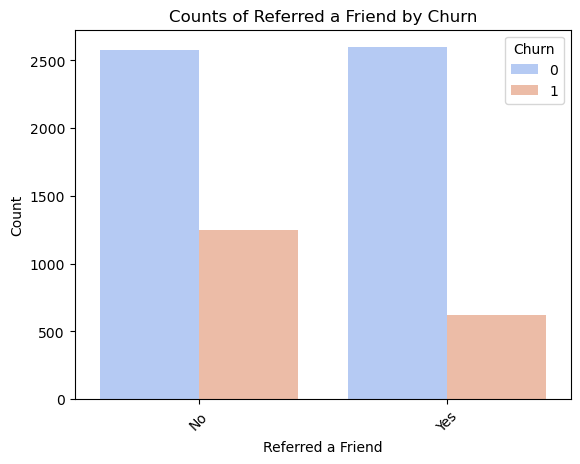

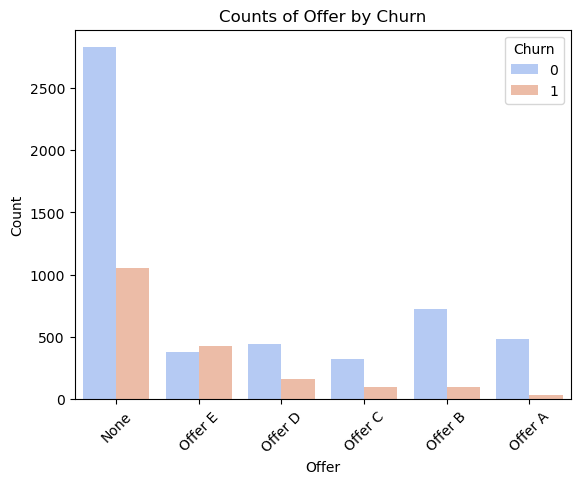

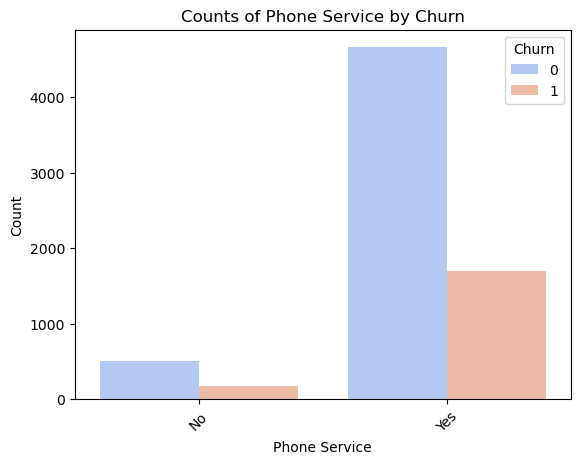

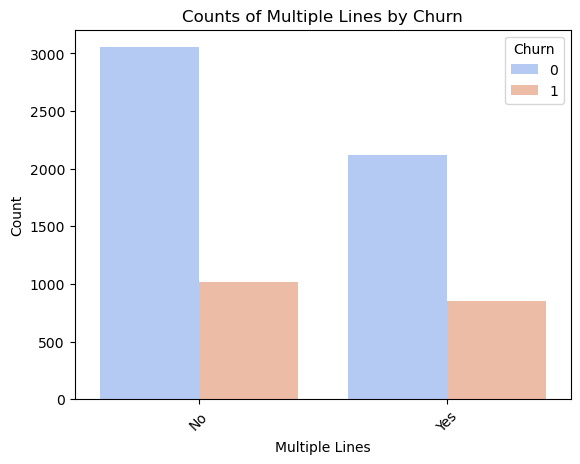

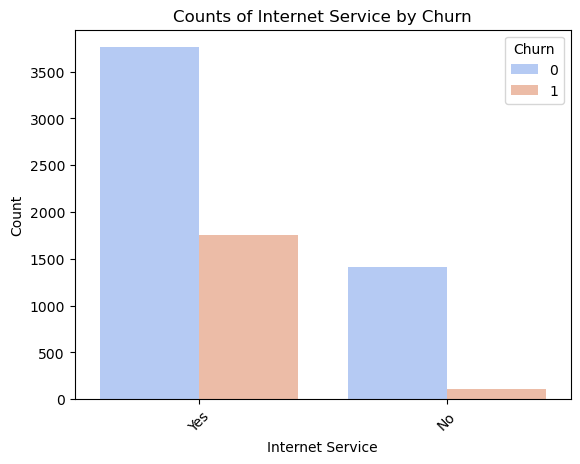

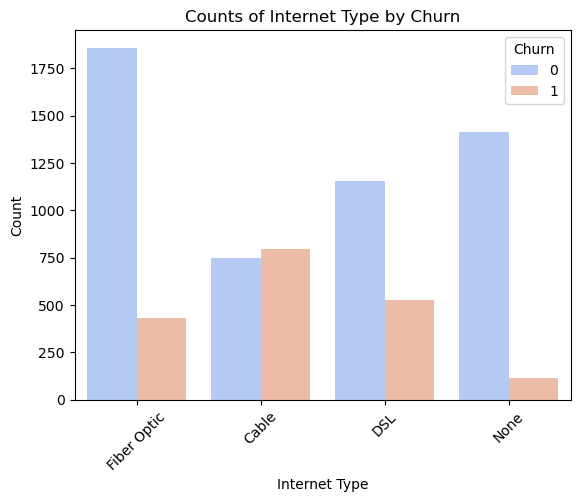

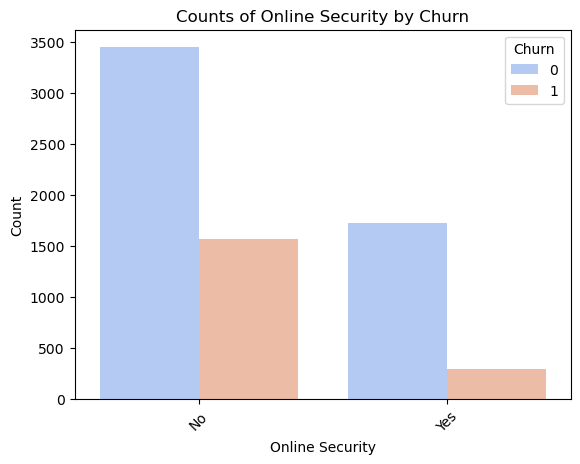

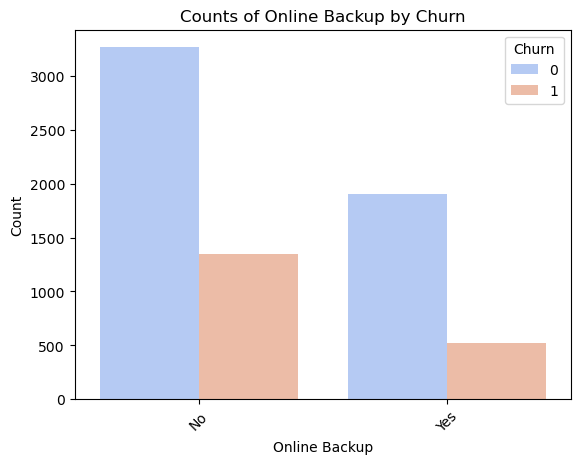

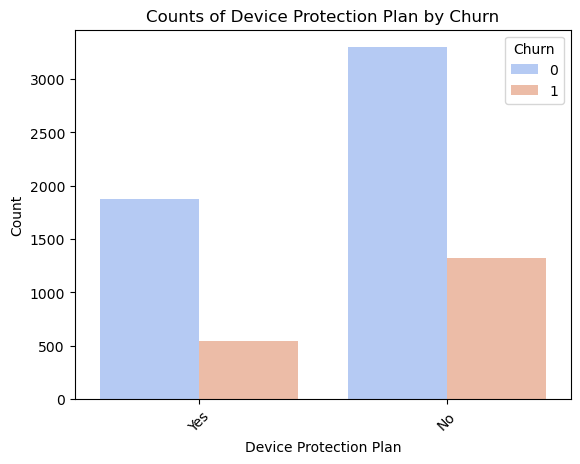

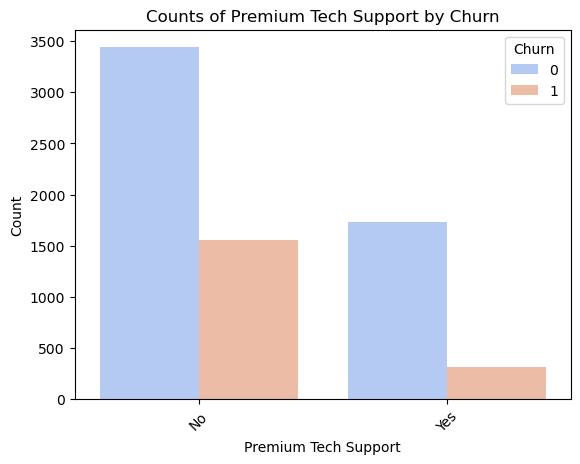

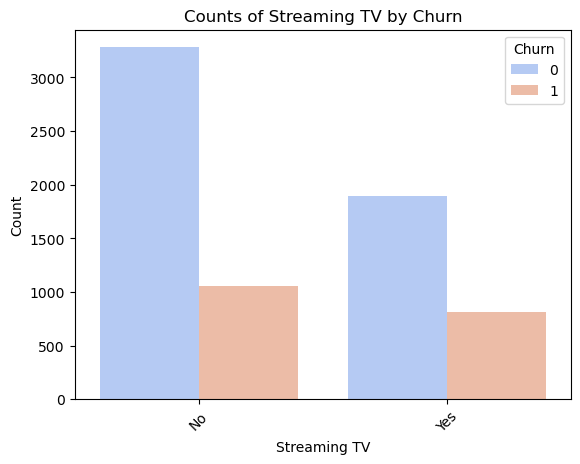

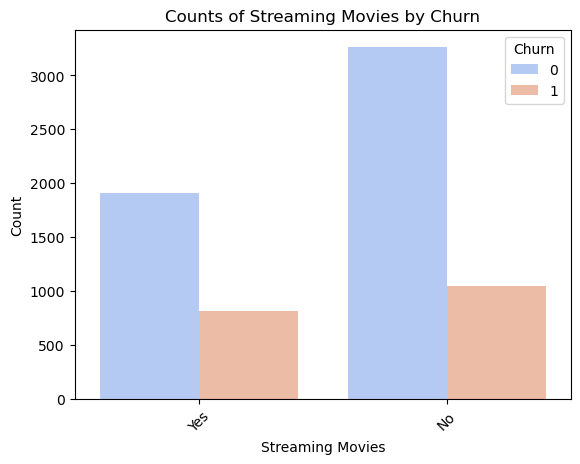

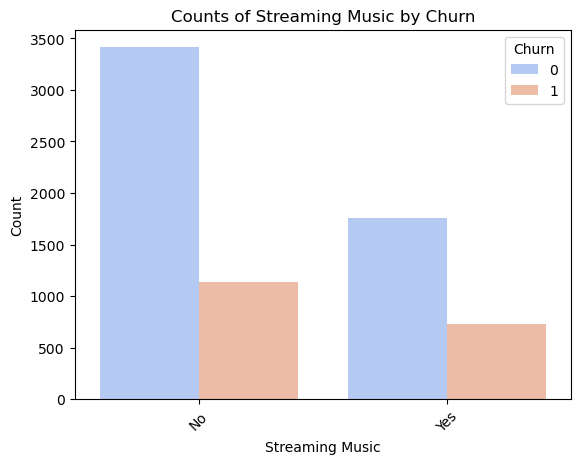

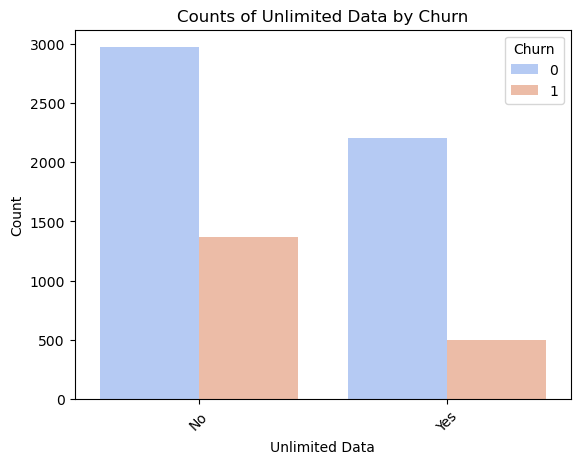

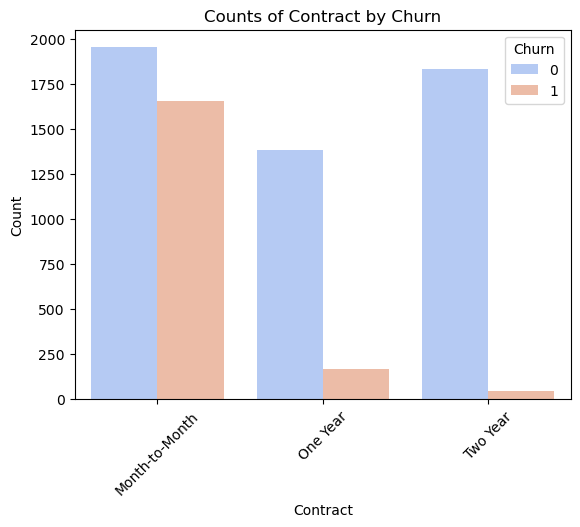

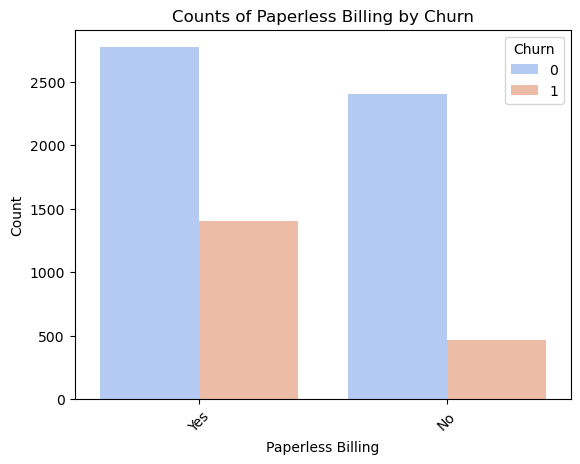

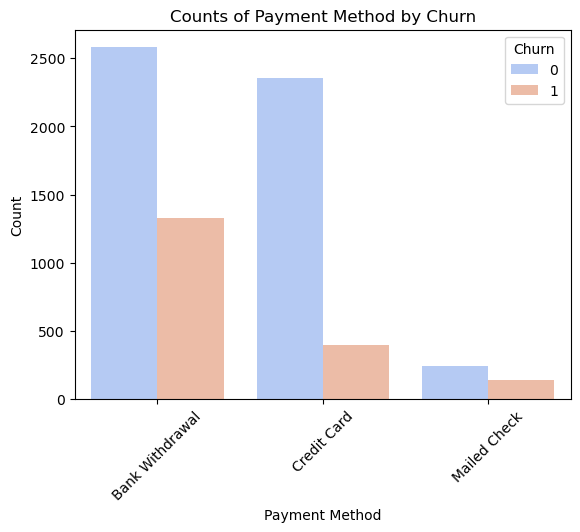

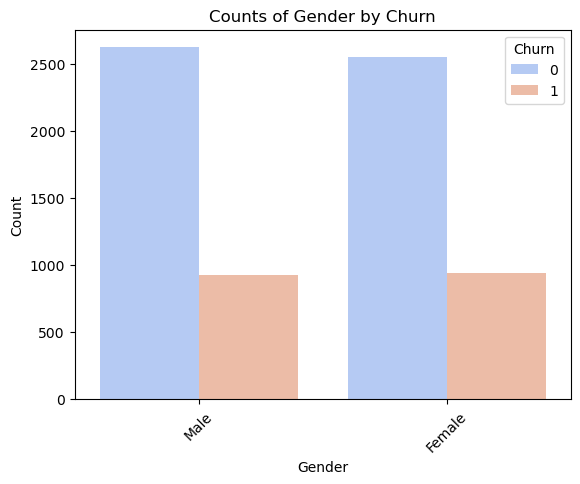

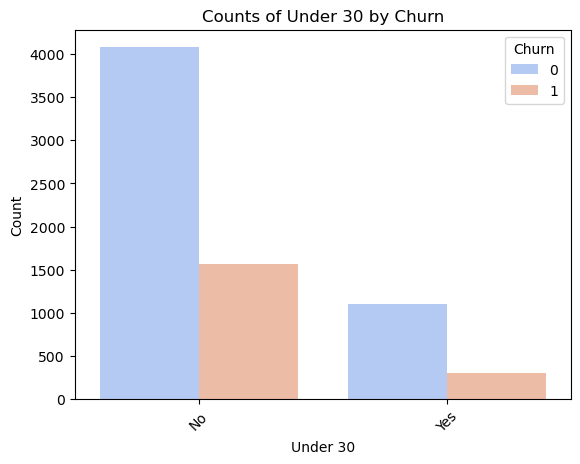

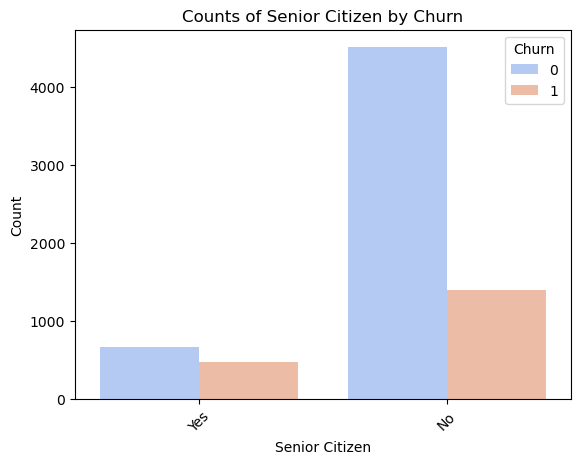

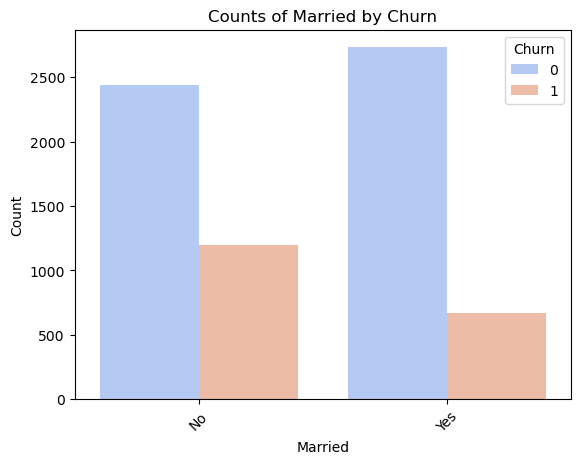

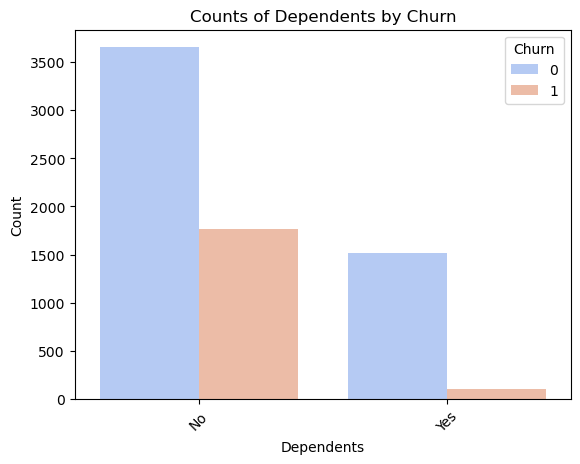

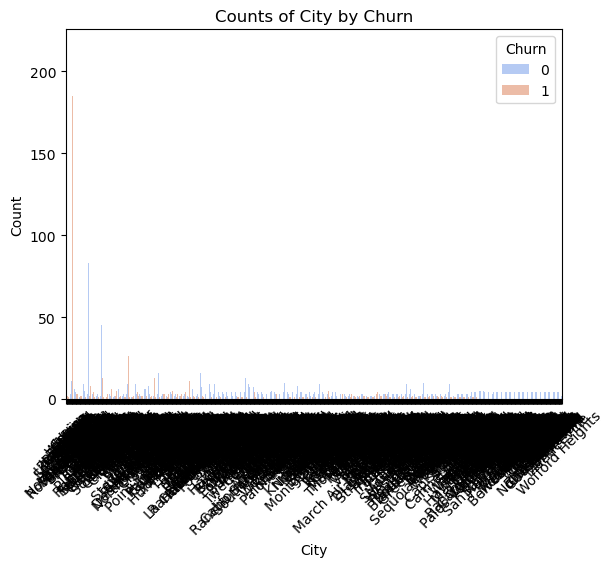

In [25]:
predictor_columns =categorical_columns
for predictor_column in predictor_columns:
    sns.countplot(data=df, x=predictor_column, hue='Churn', palette='coolwarm')
    plt.xticks(rotation=45)
    plt.xlabel(predictor_column)
    plt.ylabel('Count')
    plt.title(f'Counts of {predictor_column} by Churn')
    plt.legend(title='Churn', bbox_to_anchor=(1, 1))
    plt.show()

C:\Users\sohan\AppData\Local\Temp\ipykernel_11360\1319376277.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')


<Axes: >

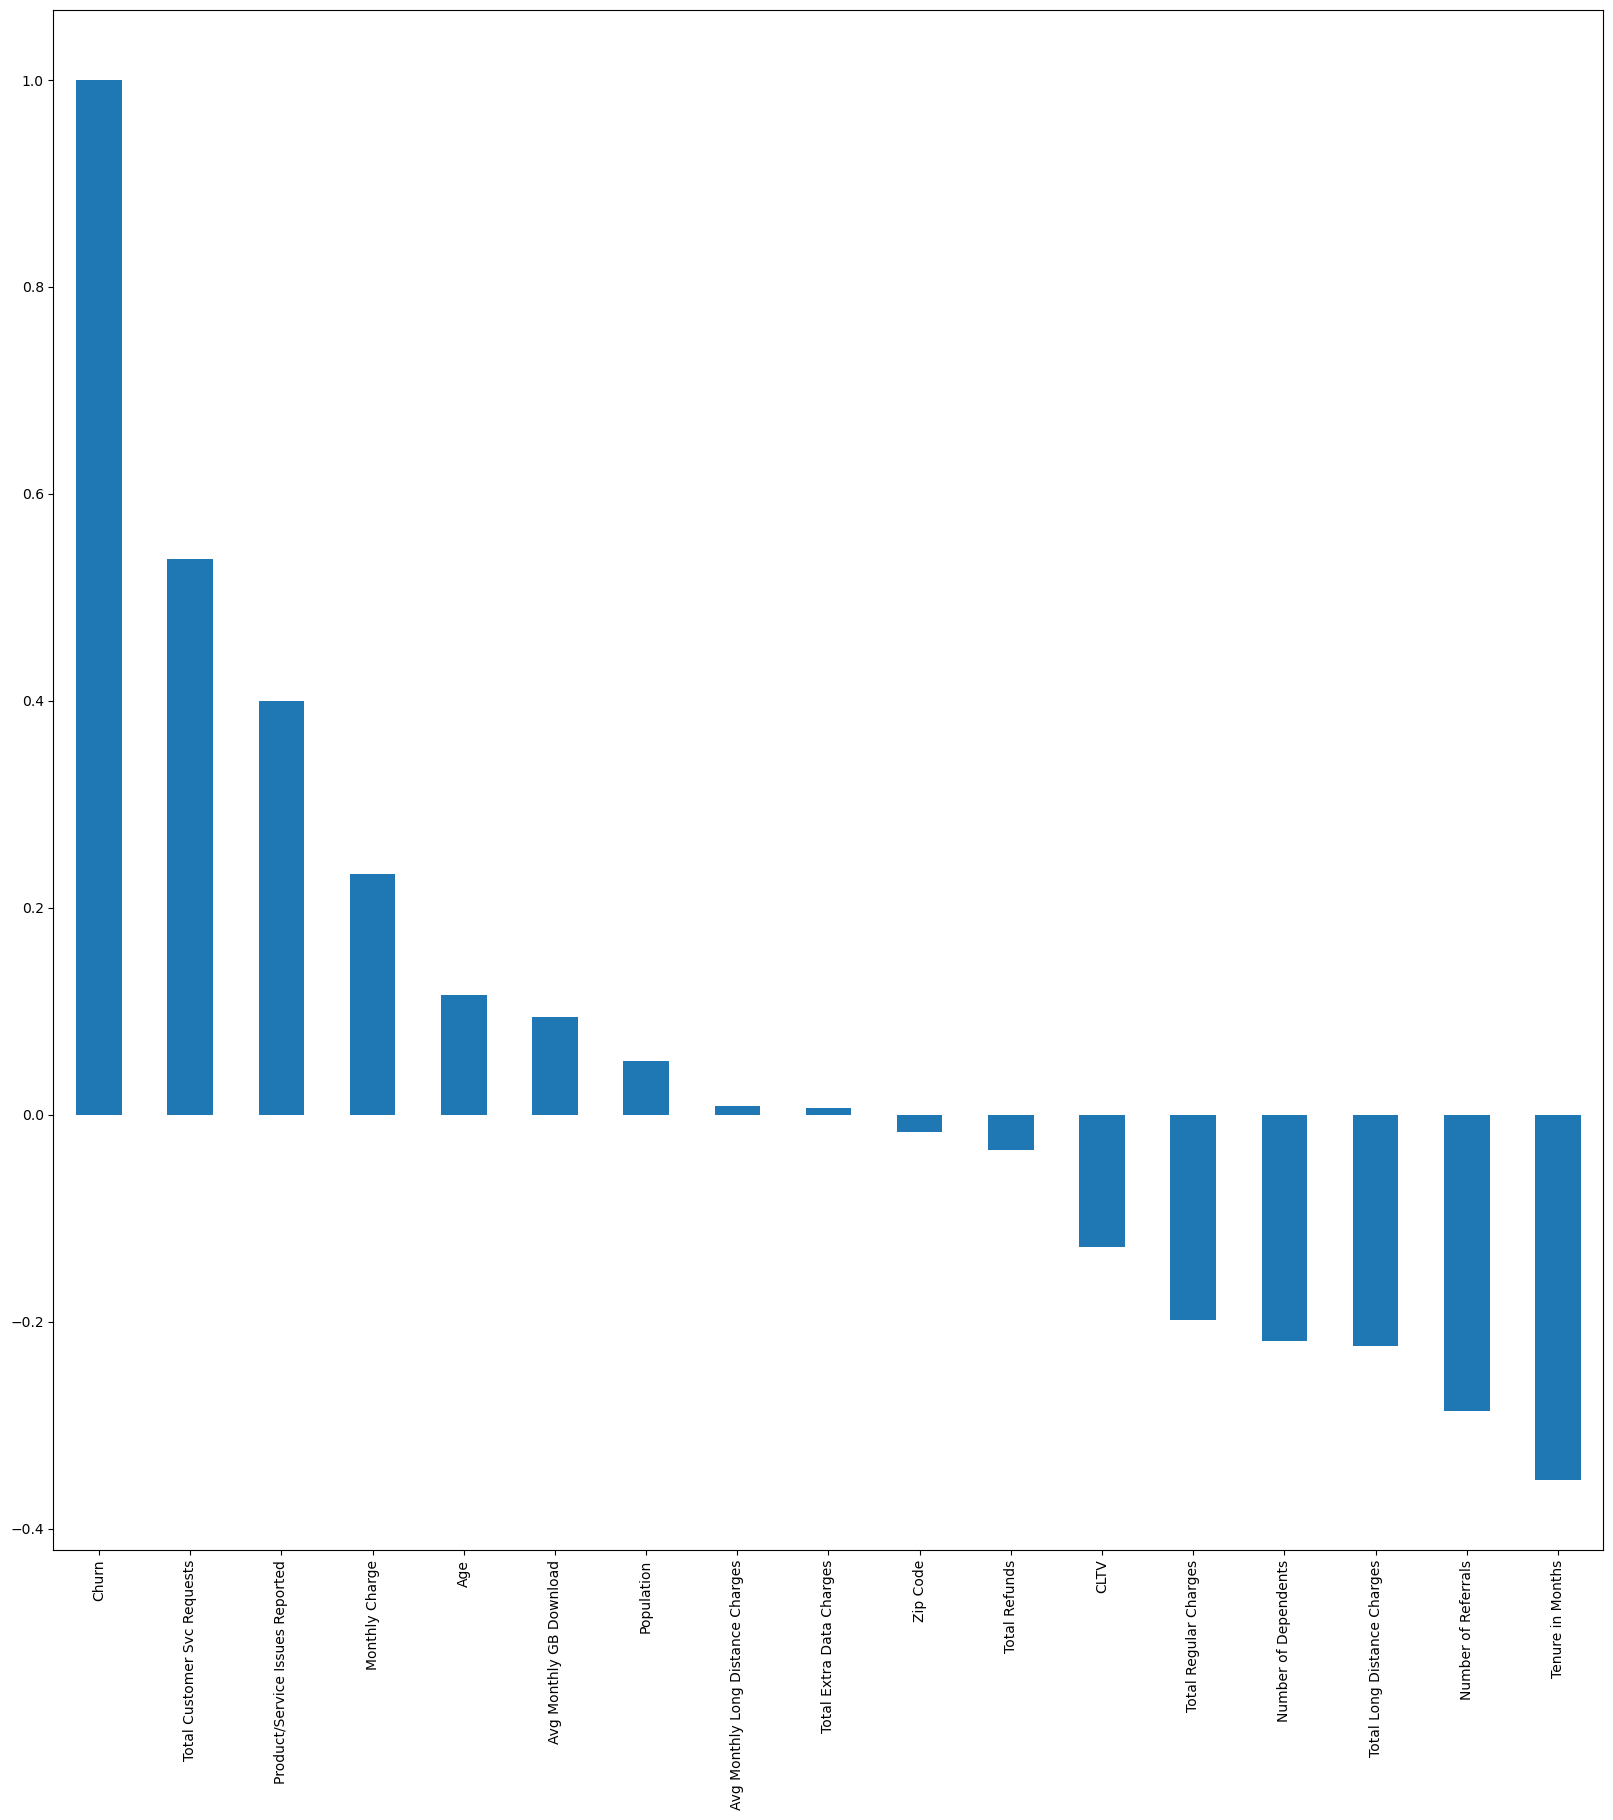

In [26]:
plt.figure(figsize = (20,20))
df.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [29]:
df

,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,...,Married,Dependents,Number of Dependents,City,Zip Code,Population,Churn,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
0,No,0,1,None,No,0.00,No,Yes,Fiber Optic,9,...,No,No,0,Los Angeles,90022,68701,1,5433,5,0
1,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,...,Yes,Yes,1,Los Angeles,90063,55668,1,5302,5,0
2,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,...,No,Yes,3,Los Angeles,90065,47534,1,3179,1,0
3,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,...,Yes,Yes,1,Inglewood,90303,27778,1,5337,1,1
4,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,...,Yes,Yes,1,Whittier,90602,26265,1,2793,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,0,72,None,Yes,22.77,No,No,None,0,...,No,No,0,Landers,92285,2182,0,5306,0,0
7039,Yes,1,24,Offer C,Yes,36.05,Yes,Yes,DSL,24,...,Yes,Yes,2,Adelanto,92301,18980,0,2140,2,0
7040,Yes,4,72,None,Yes,29.66,Yes,Yes,Cable,59,...,Yes,Yes,2,Amboy,92304,42,0,5560,2,0
7041,Yes,1,11,None,No,0.00,No,Yes,DSL,17,...,Yes,Yes,2,Angelus Oaks,92305,301,0,2793,0,0


In [30]:
# Group by 'gender' and calculate the number of churned customers for each gender
gender_churn_counts = df[df['Churn'] == 1].groupby('Gender')['Churn'].count()


In [31]:
gender_churn_counts

Gender
0    939
1    930
Name: Churn, dtype: int64

In [32]:
gender = ['Male', 'Female']

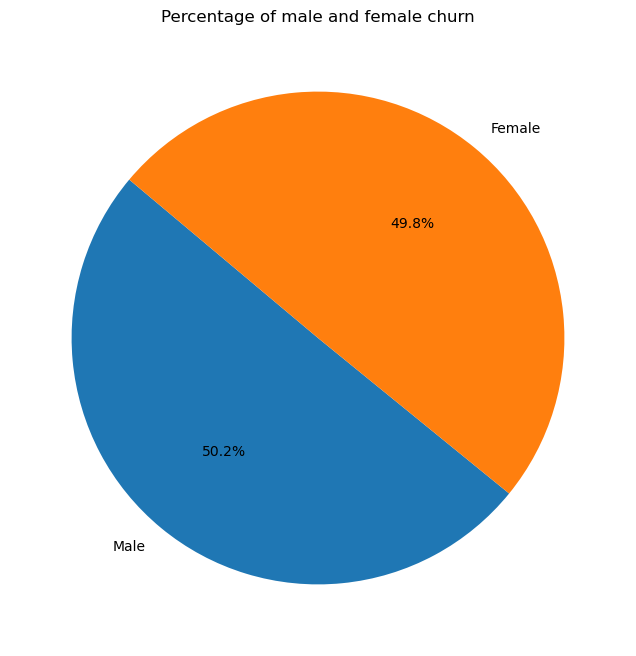

In [33]:
plt.figure(figsize = (10,8))
plt.pie(gender_churn_counts,labels = gender, autopct = '%1.1f%%', startangle = 140)
plt.title("Percentage of male and female churn")
plt.show()

As we can see that Male has high churn percentage

In [34]:
churn_counts = df[df['Churn'] == 1]['Age'].value_counts()


In [35]:
age = df['Age'].unique()
age

array([78, 74, 71, 80, 72, 76, 66, 70, 77, 65, 67, 68, 69, 79, 75, 73, 37,
       19, 31, 23, 38, 21, 29, 61, 27, 20, 56, 51, 48, 32, 34, 41, 30, 26,
       62, 64, 45, 53, 63, 42, 24, 54, 39, 43, 50, 22, 40, 47, 60, 52, 55,
       59, 49, 58, 25, 28, 33, 44, 57, 46, 36, 35], dtype=int64)

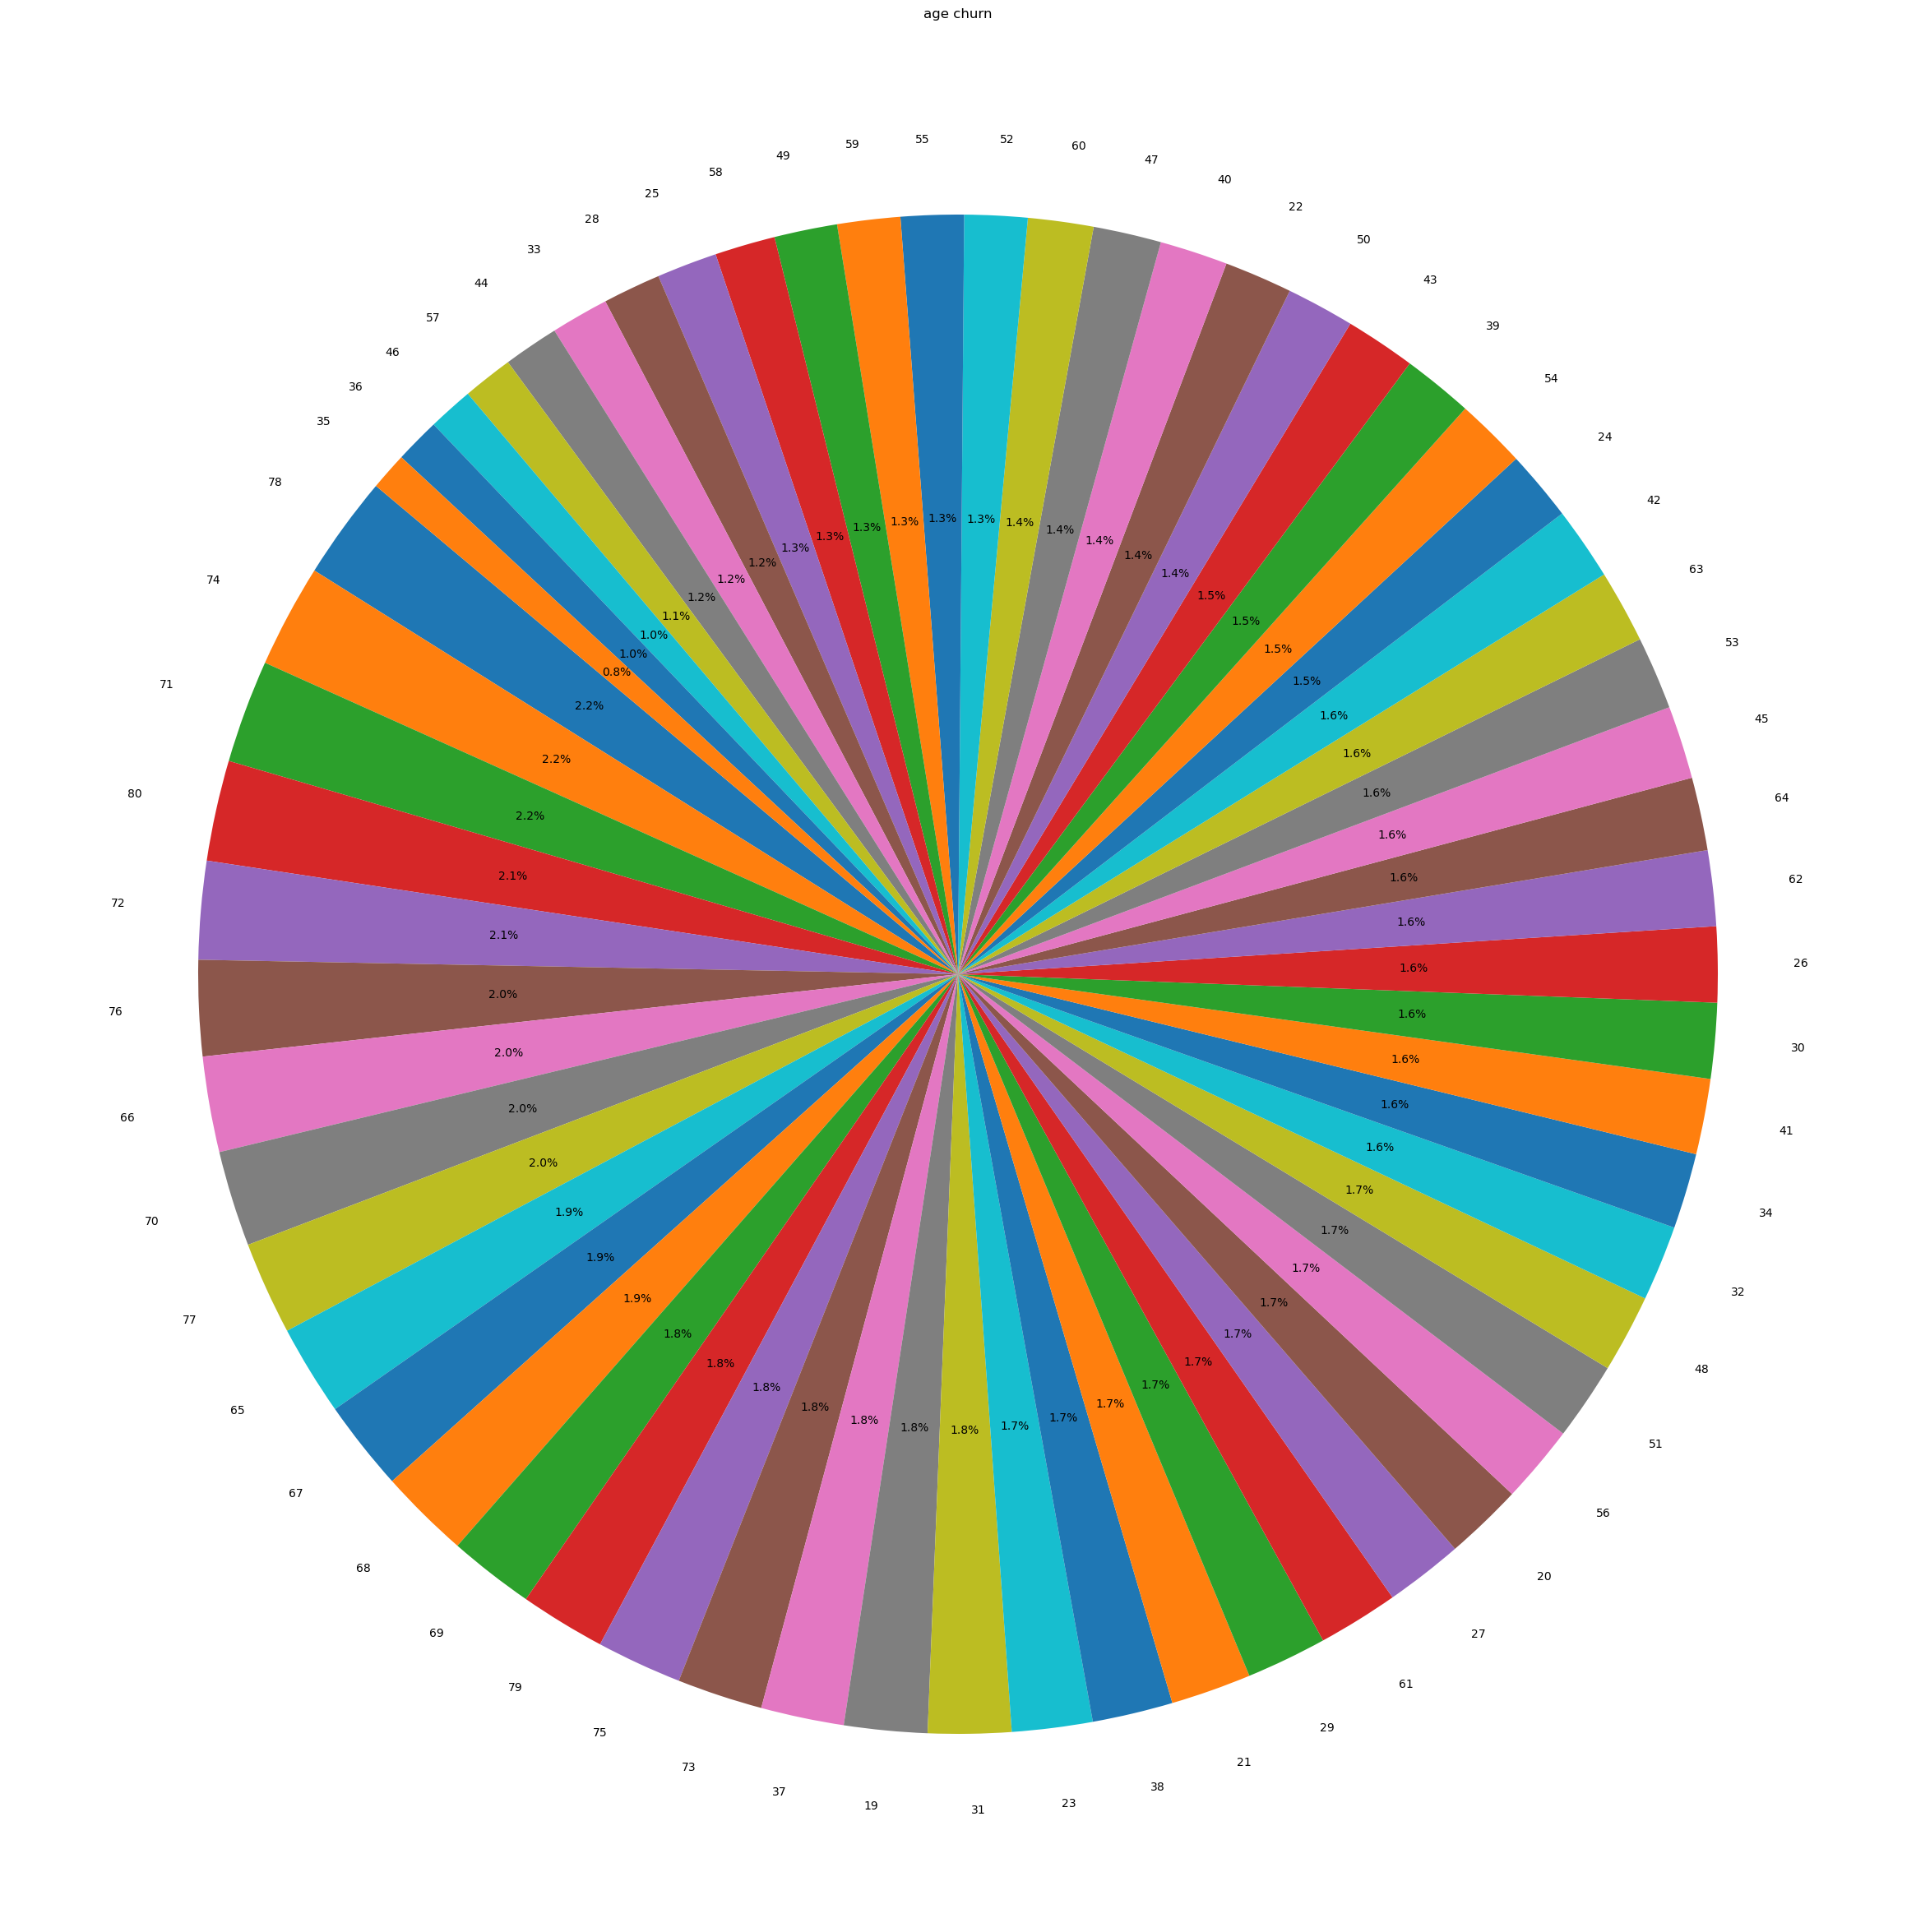

In [36]:
plt.figure(figsize = (30,30))
plt.pie(churn_counts, labels = age, autopct = '%1.1f%%', startangle = 140)
plt.title("age churn")
plt.show()

Text(0.5, 1.0, 'Age Churn Percentage')

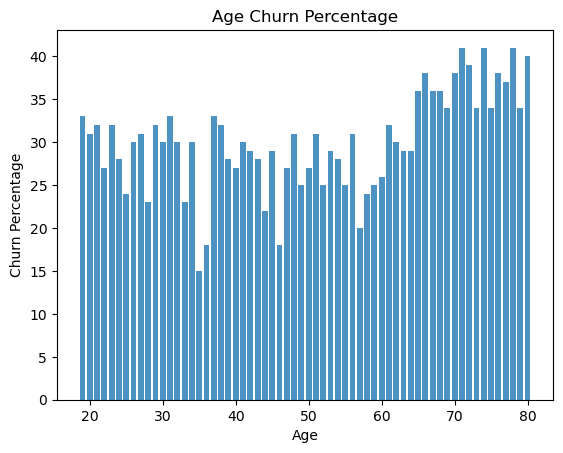

In [37]:
plt.bar(age, churn_counts, align='center', alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Churn Percentage')
plt.title('Age Churn Percentage')

In [38]:
nage=df[df['Churn']==1]['Age']
age=df[df['Churn']==0]['Age']

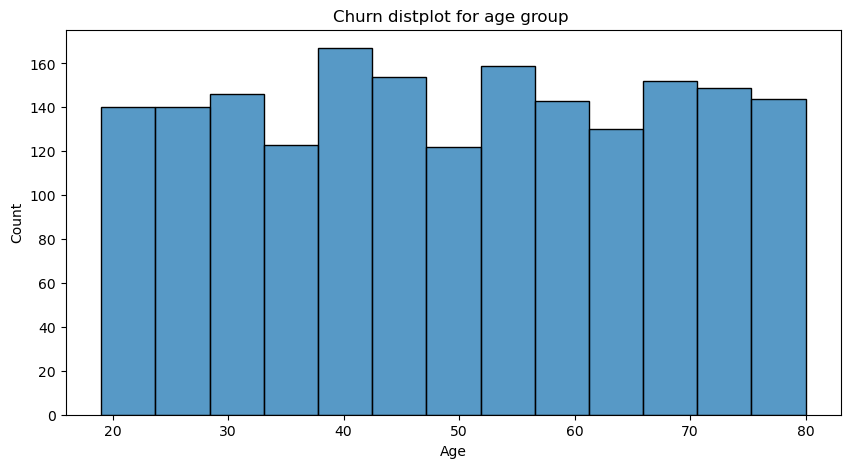

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(nage)
plt.title("Churn distplot for age group ")
plt.show()

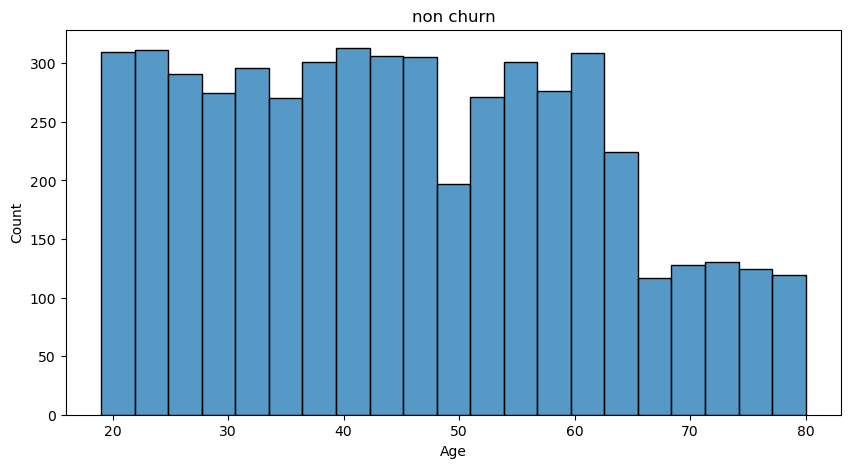

In [40]:
plt.figure(figsize = (10,5))
sns.histplot(age)
plt.title("non churn")
plt.show()

# Univarient analysis

In [41]:
categorical_columns.columns

Index(['Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Gender', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'City'],
      dtype='object')

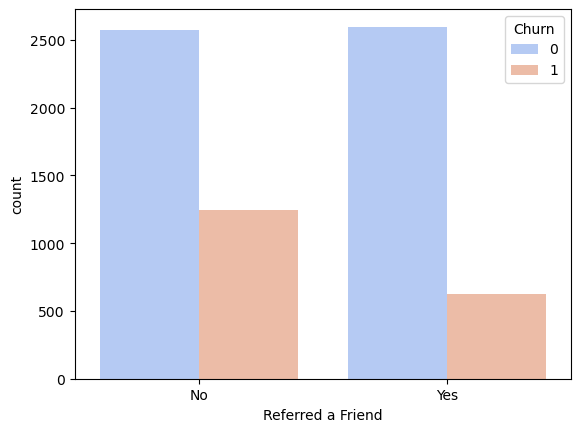

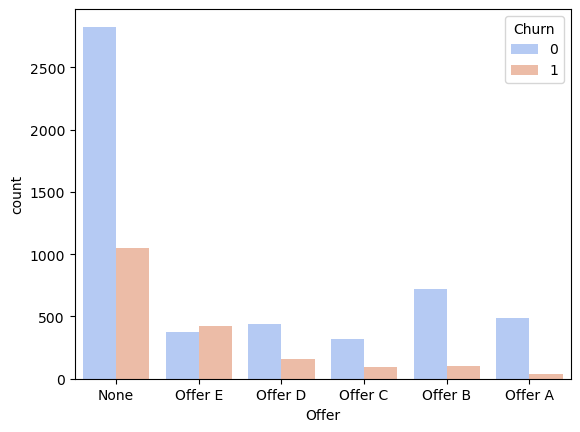

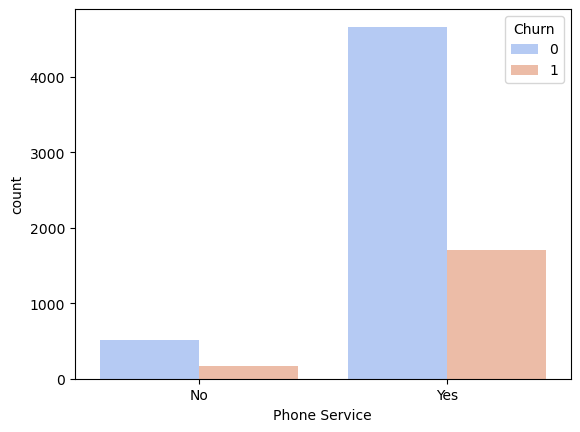

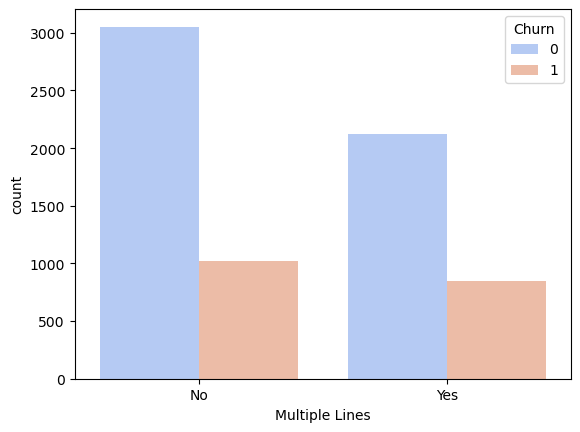

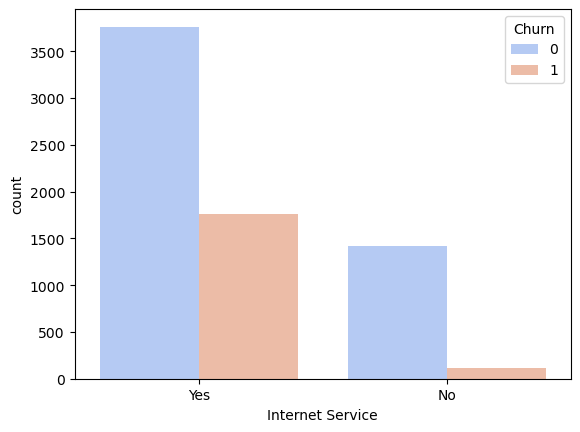

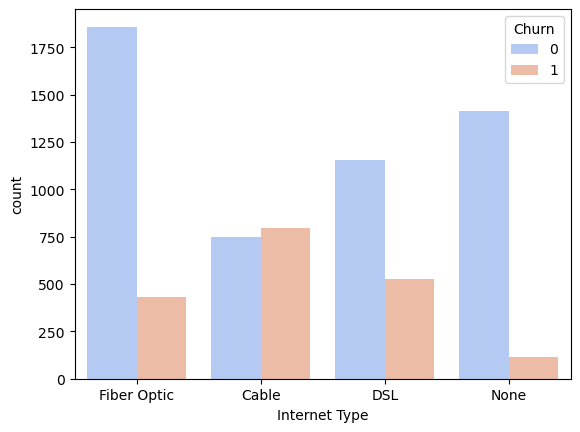

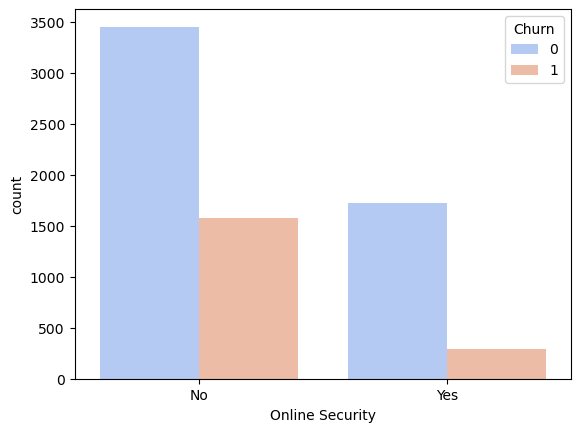

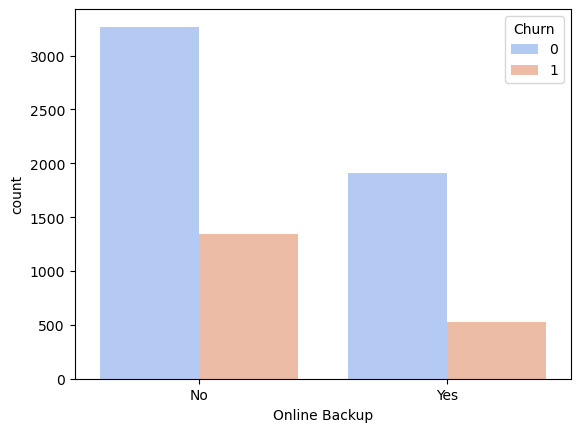

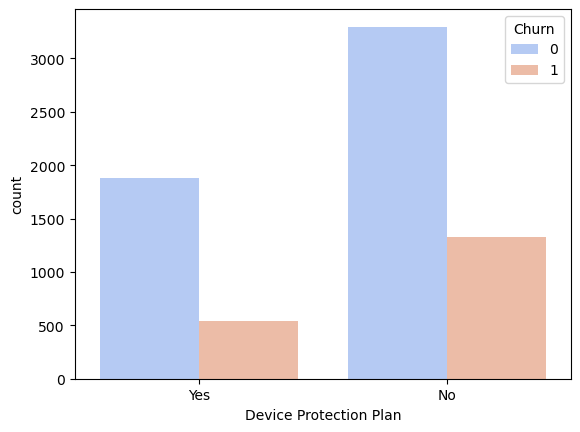

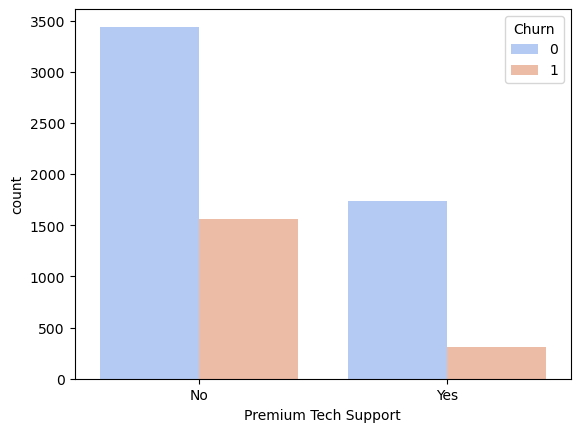

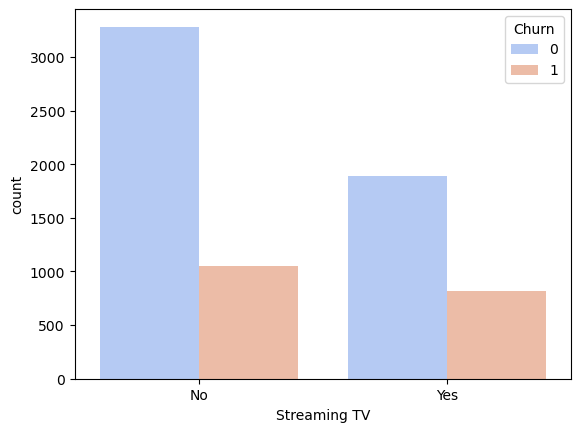

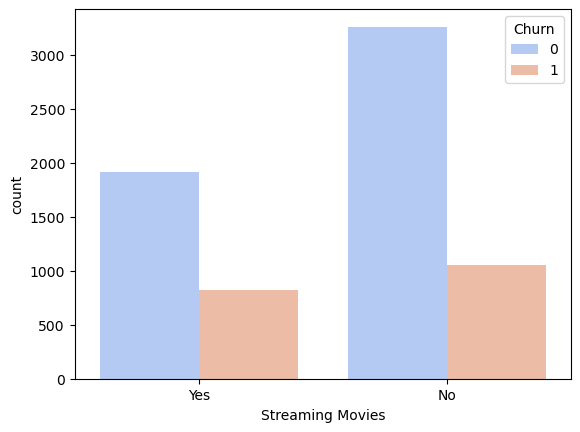

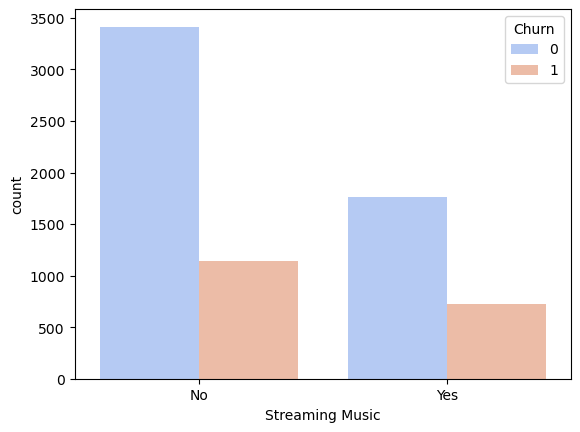

In [ ]:
predictor_columns = df[[ 'Referred a Friend', 'Offer', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Gender', 'Under 30',
       'Senior Citizen', 'Married', 'Dependents', 'City']]
for predictor_column in predictor_columns:
    sns.countplot(data=df, x=predictor_column, hue='Churn', palette='coolwarm')
    plt.show()

# Converting the categorical values into numerical values

In [ ]:
columns_to_exclude = ["City"]
df_without_city = df.drop(columns=columns_to_exclude)
df_dummies = pd.get_dummies(df_without_city)
df_dummies

In [ ]:
df_dummies.columns

In [ ]:
sns.lmplot(data=df_dummies, x='Monthly Charge', y='Total Regular Charges', fit_reg=False)

In [ ]:
plt.figure(figsize=(20, 10))
correlation = df_dummies.corr()['Churn'].sort_values(ascending=False)
correlation.plot(kind='bar')

plt.xlabel('Columns')
plt.ylabel('Correlation with Churn')
plt.title('Correlation between Columns and Churn')
plt.show()


Month to month contract customers, cable type customers, no dependent customers, monthly charge customer are havingn high churn

# Bivariate Analysis

In [ ]:
new_df1_target0=df.loc[df["Churn"]==0]
new_df1_target1=df.loc[df["Churn"]==1]

In [ ]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data=hue)
    fig, ax = plt.subplots()
    
    # Set a maximum width for the figure
    max_width = 20
    
    # Calculate the width based on the number of unique values in the column
    width = min(len(df[col].unique()) + 7 + 4 * len(temp.unique()), max_width)
    
    fig.set_size_inches(width, 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, hue=hue, palette='bright')
    plt.show()


In [ ]:
uniplot(new_df1_target1,col = 'Age',title='Distribution of Gender for Churned Customers',hue='Gender')

In [ ]:
uniplot(new_df1_target1,col = 'Payment Method',title='Distribution of Gender for Churned Customers',hue='Gender')

In [ ]:
uniplot(new_df1_target1,col = 'Offer',title='Distribution of Gender for Churned Customers',hue='Gender')

In  Offer Male is likely to churn

In [ ]:
uniplot(new_df1_target1,col = 'Internet Type',title='Distribution of Gender for Churned Customers',hue='Gender')

In [ ]:
uniplot(new_df1_target1,col = 'Total Customer Svc Requests',title='Distribution of Gender for Churned Customers',hue='Gender')

In [ ]:
uniplot(new_df1_target1,col = 'Product/Service Issues Reported',title='Distribution of Gender for Churned Customers',hue='Gender')

In [ ]:
df.columns

In [ ]:
uniplot(new_df1_target1,col = 'Senior Citizen',title='Distribution of Gender for Churned Customers',hue='Gender')

As we can see non senior citizen are more churners

In [ ]:
uniplot(new_df1_target1,col = 'Tenure in Months',title='Distribution of Gender for Churned Customers',hue='Gender')

In [ ]:
uniplot(new_df1_target1,col = 'Contract',title='Distribution of Gender for Churned Customers',hue='Gender')

Long term Contract are less likely to churn as expected

In [ ]:
uniplot(new_df1_target1,col = 'Under 30',title='Distribution of Gender for Churned Customers',hue='Gender')

In [ ]:
uniplot(new_df1_target1,col = 'Unlimited Data',title='Distribution of Gender for Churned Customers',hue='Gender')

In [ ]:
#Blue is male and orange is Female

In [ ]:
df = df_dummies
df

# Handling the imbalance data

In [ ]:
df['Churn'].value_counts()

In [ ]:
import seaborn as sns

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df, x='Churn')
plt.show()

In [ ]:
X=df.drop('Churn',axis=1)
y = df['Churn']

# Handling the data with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [ ]:
y_res.value_counts()

# Spliting the Data to train and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

# Feature Scaling 

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc= StandardScaler()

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log = LogisticRegression()

In [ ]:
log.fit(X_train,y_train)

In [ ]:
y_pred1 = log.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred1)

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
precision_score(y_test,y_pred1)

In [ ]:
recall_score(y_test,y_pred1)

In [ ]:
f1_score(y_test,y_pred1)

# SVC

In [ ]:
from sklearn import svm

In [ ]:
svm = svm.SVC()

In [ ]:
svm.fit(X_train,y_train)

In [ ]:
y_pred2 = svm.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred2)

In [ ]:
precision_score(y_test,y_pred2)

# KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

In [ ]:
y_pred3 = knn.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred3)

In [ ]:
precision_score(y_test,y_pred3)

# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,y_train)

In [ ]:
y_pred4 = dt.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred4)

In [ ]:
precision_score(y_test,y_pred4)

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,y_train)

In [ ]:
y_pred5 = rf.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred5)

In [ ]:
precision_score(y_test,y_pred5)

# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train,y_train)

In [ ]:
y_pred6 = gbc.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred6)

In [ ]:
precision_score(y_test,y_pred6)

# Saving the Model 

In [ ]:
X_res=sc.fit_transform(X_res)

In [ ]:
gbc.fit(X_res,y_res)

In [ ]:
import joblib

In [ ]:
joblib.dump(gbc,'churn_predict_model')

In [ ]:
model = joblib.load('churn_predict_model')

In [ ]:
data.columns

# GUI

In [ ]:
from tkinter import *
from sklearn.preprocessing import StandardScaler
import joblib

In [ ]:
data.columns

In [ ]:


def show_entry_fields():
    referred_a_friend = int(e1.get())
    num_of_referrals = int(e2.get())
    tenure_in_months = int(e3.get())
    offer = int(e4.get())
    phone_service = int(e5.get())
    avg_monthly_long_distance_charges = float(e6.get())
    multiple_lines = int(e7.get())
    internet_service = int(e8.get())
    internet_type = int(e9.get())
    avg_monthly_gb_download = float(e10.get())
    online_security = int(e11.get())
    online_backup = int(e12.get())
    device_protection_plan = int(e13.get())
    premium_tech_support = int(e14.get())
    streaming_tv = int(e15.get())
    streaming_movies = int(e16.get())
    streaming_music = int(e17.get())
    unlimited_data = int(e18.get())
    contract = int(e19.get())
    paperless_billing = int(e20.get())
    payment_method = int(e21.get())
    monthly_charge = float(e22.get())
    total_regular_charges = float(e23.get())
    total_refunds = float(e24.get())
    total_extra_data_charges = float(e25.get())
    total_long_distance_charges = float(e26.get())
    gender = int(e27.get())
    age = int(e28.get())
    under_30 = int(e29.get())
    senior_citizen = int(e30.get())
    married = int(e31.get())
    dependents = int(e32.get())
    num_of_dependents = int(e33.get())
    city = int(e34.get())
    zip_code = int(e35.get())
    population = int(e36.get())

    # Rest of the code for the prediction
    model = joblib.load('churn_model')  # Load the trained model
    # Assuming sc is your scaler object used during training
    result = model.predict(sc.transform([[referred_a_friend, num_of_referrals,
                                          tenure_in_months, offer,
                                          phone_service, avg_monthly_long_distance_charges,
                                          multiple_lines, internet_service, internet_type,
                                          avg_monthly_gb_download, online_security, online_backup,
                                          device_protection_plan, premium_tech_support,
                                          streaming_tv, streaming_movies, streaming_music,
                                          unlimited_data, contract, paperless_billing,
                                          payment_method, monthly_charge, total_regular_charges,
                                          total_refunds, total_extra_data_charges,
                                          total_long_distance_charges, gender, age, under_30,
                                          senior_citizen, married, dependents, num_of_dependents,
                                          city, zip_code, population]]))

    if result == 0:
        Label(master, text="No Exit").grid(row=37, columnspan=2)
    else:
        Label(master, text="Exit").grid(row=37, columnspan=2)

# Create the main application window
master = Tk()
master.title("Telecom Churn Prediction ")

# Add labels for column names
Label(master, text="Referred a Friend").grid(row=1)
Label(master, text="Number of Referrals").grid(row=2)
Label(master, text="Tenure in Months").grid(row=3)
Label(master, text="Offer").grid(row=4)
Label(master, text="Phone Service").grid(row=5)
Label(master, text="Avg Monthly Long Distance Charges").grid(row=6)
Label(master, text="Multiple Lines").grid(row=7)
Label(master, text="Internet Service").grid(row=8)
Label(master, text="Internet Type").grid(row=9)
Label(master, text="Avg Monthly GB Download").grid(row=10)
Label(master, text="Online Security").grid(row=11)
Label(master, text="Online Backup").grid(row=12)
Label(master, text="Device Protection Plan").grid(row=13)
Label(master, text="Premium Tech Support").grid(row=14)
Label(master, text="Streaming TV").grid(row=15)
Label(master, text="Streaming Movies").grid(row=16)
Label(master, text="Streaming Music").grid(row=17)
Label(master, text="Unlimited Data").grid(row=18)
Label(master, text="Contract").grid(row=19)
Label(master, text="Paperless Billing").grid(row=20)
Label(master, text="Payment Method").grid(row=21)
Label(master, text="Monthly Charge").grid(row=22)
Label(master, text="Total Regular Charges").grid(row=23)
Label(master, text="Total Refunds").grid(row=24)
Label(master, text="Total Extra Data Charges").grid(row=25)
Label(master, text="Total Long Distance Charges").grid(row=26)
Label(master, text="Gender").grid(row=27)
Label(master, text="Age").grid(row=28)
Label(master, text="Under 30").grid(row=29)
Label(master, text="Senior Citizen").grid(row=30)
Label(master, text="Married").grid(row=31)
Label(master, text="Dependents").grid(row=32)
Label(master, text="Number of Dependents").grid(row=33)
Label(master, text="City").grid(row=34)
Label(master, text="Zip Code").grid(row=35)
Label(master, text="Population").grid(row=36)

# Create entry fields for user input
e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)
e14 = Entry(master)
e15 = Entry(master)
e16 = Entry(master)
e17 = Entry(master)
e18 = Entry(master)
e19 = Entry(master)
e20 = Entry(master)
e21 = Entry(master)
e22 = Entry(master)
e23 = Entry(master)
e24 = Entry(master)
e25 = Entry(master)
e26 = Entry(master)
e27 = Entry(master)
e28 = Entry(master)
e29 = Entry(master)
e30 = Entry(master)
e31 = Entry(master)
e32 = Entry(master)
e33 = Entry(master)
e34 = Entry(master)
e35 = Entry(master)
e36 = Entry(master)

# Position entry fields in the same order as labels
e1.grid(row=1, column=1)
e2.grid(row=2, column=1)
e3.grid(row=3, column=1)
e4.grid(row=4, column=1)
e5.grid(row=5, column=1)
e6.grid(row=6, column=1)
e7.grid(row=7, column=1)
e8.grid(row=8, column=1)
e9.grid(row=9, column=1)
e10.grid(row=10, column=1)
e11.grid(row=11, column=1)
e12.grid(row=12, column=1)
e13.grid(row=13, column=1)
e14.grid(row=14, column=1)
e15.grid(row=15, column=1)

entries = [e1, e2, e3, e4, e5, e6, e7, e8, e9, e10,
           e11, e12, e13, e14, e15, e16, e17, e18, e19, e20,
           e21, e22, e23, e24, e25, e26, e27, e28, e29, e30,
           e31, e32, e33, e34, e35, e36]

# Now, you can use a for loop to grid each Entry widget to their respective rows and columns.
for i, entry in enumerate(entries, start=1):
    entry.grid(row=i, column=1)



In [ ]:
Button(master, text='Predict', command=show_entry_fields).grid()

mainloop()# Assuming you have created a list of Entry widgets named 'entries'





# In predicting customer churn for the telecom industry, we initially used Logistic Regression, which achieved good accuracy. However, our experimentation with Gradient Boosting revealed that it outperformed Logistic Regression, delivering even higher predictive accuracy. As a result, Gradient Boosting emerged as the more suitable model for this specific churn prediction task